# **Who is the real Winner? - Python Assignment CS253**

This notebook presents my solution to the Python Assignment for CS253 course during winter 2024. The objective was to predict the Education Level of the Winners of the State Elections, using a dataset of recent State and UT election winners across India for different states and UTs. It's a Multi-Class Classification Problem.

## Libraries Imported

- **pandas**: Essential for data manipulation.
- **matplotlib.pyplot**: Used for data visualization.
- **seaborn**: Another powerful tool for data visualization.
- **RandomForestClassifier** from **sklearn.ensemble**: Employed for classification tasks.
- **LabelEncoder** from **sklearn.preprocessing**: Necessary for preprocessing categorical data.
- **train_test_split** from **sklearn.model_selection**: Essential for splitting data into training and testing sets.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# **Load the datasets**

We use the `pd.read_csv()` function from the pandas library to read the training dataset from a CSV file named 'train.csv' and assign it to the variable `train_data`. Similarly, we read the test dataset from a CSV file named 'test.csv' and assign it to the variable `test_data`.

In [4]:
# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Function to Convert 'Total Assets' Values to Numeric

This function, `convert_assets_to_numeric`, is designed to convert the values in the 'Total Assets' column from string format to numeric format. Here's how it works:

- **Input**: `asset_value`, representing the value of total assets in string format.
- **Conversion Logic**:
  - If 'Crore' is found in `asset_value`, it's multiplied by 10^7 to convert it to crore units.
  - If 'Lac' is found, it's multiplied by 10^5 to convert it to lakh units.
  - If 'Thou' is found, it's multiplied by 10^3 to convert it to thousand units.
  - If none of these terms are found, it's directly converted to a float.
- **Application**: The function is applied to the 'Total Assets' column of both the training and test datasets (`train_data` and `test_data`) using the `apply()` function.
- **Output**: The 'Total Assets' column in both datasets is converted to numeric format.

After applying the conversion function, basic statistics of the numerical features in the training dataset are displayed using the `describe()` function, and the results are printed to the console.


In [5]:
# Function to convert 'Total Assets' values to numeric
def convert_assets_to_numeric(asset_value):
    if 'Crore' in asset_value:
        return float(asset_value.replace(' Crore+', '')) * 10**7
    elif 'Lac' in asset_value:
        return float(asset_value.replace(' Lac+', '')) * 10**5
    elif 'Thou' in asset_value:
        return float(asset_value.replace(' Thou+', '')) * 10**3
    else:
        return float(asset_value)

# Apply conversion function to 'Total Assets' column
train_data['Total Assets'] = train_data['Total Assets'].apply(convert_assets_to_numeric)
test_data['Total Assets'] = test_data['Total Assets'].apply(convert_assets_to_numeric)

# Display basic statistics of numerical features
print("Basic Statistics of Numerical Features:")
print(train_data.describe())

Basic Statistics of Numerical Features:
                ID  Criminal Case  Total Assets
count  2059.000000    2059.000000  2.059000e+03
mean   1029.000000       1.777562  1.155991e+08
std     594.526422       4.762183  4.922465e+08
min       0.000000       0.000000  0.000000e+00
25%     514.500000       0.000000  9.500000e+06
50%    1029.000000       0.000000  2.000000e+07
75%    1543.500000       2.000000  8.000000e+07
max    2058.000000      87.000000  1.267000e+10


# Display the Distribution of Education Levels

This code segment generates a visualization to display the distribution of Education levels in the training dataset (`train_data`). Here's a breakdown of what it does:

- **Figure Size**: Sets the size of the figure to (10, 6) inches.
- **Visualization**: Uses `sns.countplot()` from the seaborn library to create a count plot. It plots the count of occurrences of each Education level (`x='Education'`) and colors the bars based on the Education level itself (`hue='Education'`).
- **Color Palette**: Sets the color palette to 'Set2' for better visual distinction.
- **Title and Labels**: Adds a title to the plot as 'Distribution of Education Levels'. The x-axis label is set to 'Education Level', and the y-axis label is set to 'Count'.
- **Display**: Finally, the plot is displayed using `plt.show()`.

This visualization helps us understand the distribution of Education levels among the individuals in the dataset.


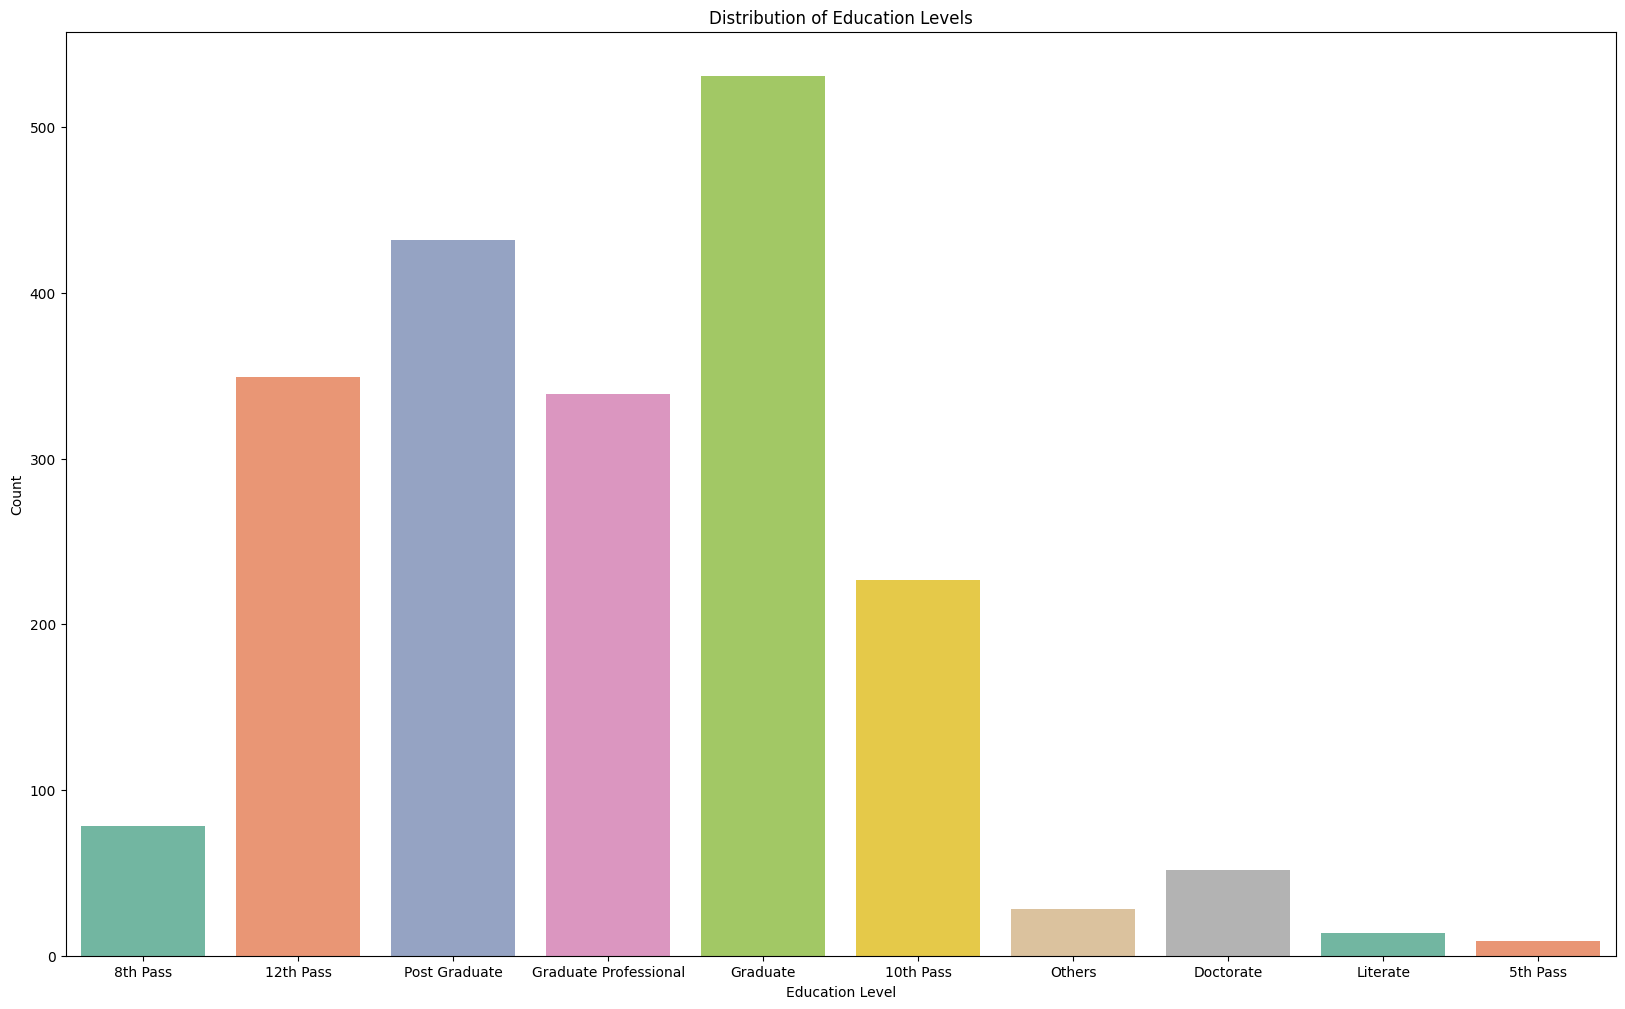

In [7]:
# Display the distribution of Education levels
plt.figure(figsize=(20, 12))
sns.countplot(x='Education', hue='Education', data=train_data, palette='Set2', legend=False)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Distribution of Criminal Cases by Party

This code segment generates a visualization to display the distribution of criminal cases among different political parties in the training dataset (`train_data`). Here's a breakdown of what it does:

- **Figure Size**: Sets the size of the figure to (12, 6) inches.
- **Visualization**: Uses `sns.countplot()` from the seaborn library to create a count plot. It plots the count of occurrences of different numbers of criminal cases (`x='Criminal Case'`) and colors the bars based on the political party (`hue='Party'`).
- **Color Palette**: Sets the color palette to 'tab10' for better visual distinction.
- **Title and Labels**: Adds a title to the plot as 'Distribution of Criminal Cases by Party'. The x-axis label is set to 'Number of Criminal Cases', and the y-axis label is set to 'Count'.
- **Legend**: Adds a legend to the plot to indicate the political party corresponding to each color. The legend title is set to 'Party', and it is positioned outside the plot area using `bbox_to_anchor=(1, 1)`.
- **Display**: Finally, the plot is displayed using `plt.show()`.

This visualization helps us understand the distribution of criminal cases across different political parties, providing insights into the legal history of candidates associated with each party.


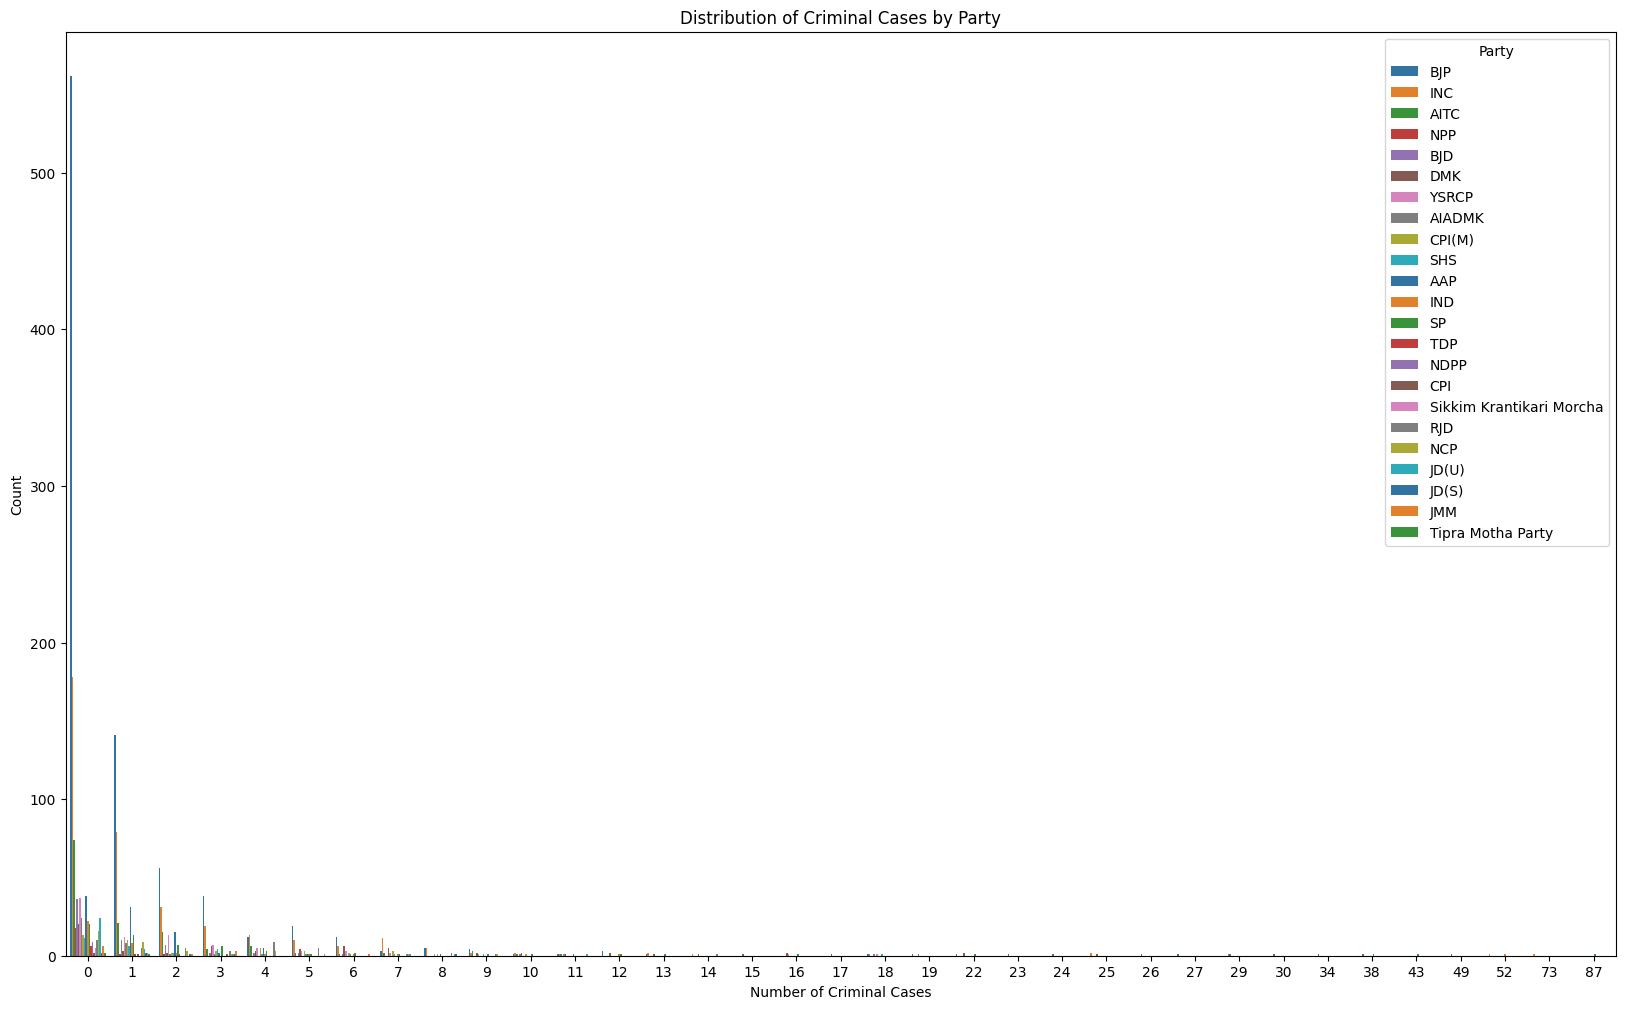

In [8]:
# Distribution of Criminal Cases by Party
plt.figure(figsize=(20, 12))
sns.countplot(x='Criminal Case', hue='Party', data=train_data, palette='tab10')
plt.title('Distribution of Criminal Cases by Party')
plt.xlabel('Number of Criminal Cases')
plt.ylabel('Count')
plt.legend(title='Party', bbox_to_anchor=(1, 1))
plt.show()

# Calculating Percentage Distribution of Parties with High Criminal Records

This code segment performs the following steps:

1. **Calculation of Median and Standard Deviation**: It computes the median and standard deviation of criminal records in the training dataset.
   
2. **Filtering High Criminal Records**: Candidates with criminal records higher than the sum of the median and standard deviation are filtered into a new dataframe.

3. **Percentage Distribution by Party**: It calculates the percentage distribution of parties with candidates having high criminal records.

4. **Plotting the Pie Chart**: A pie chart is generated to visualize the percentage distribution of parties with candidates having high criminal records. Each slice represents a party, and the percentage of candidates with high criminal records from each party is shown.

5. **Legend Placement**: The legend, which indicates the parties corresponding to each slice of the pie chart, is displayed in a separate panel to the right of the chart. This ensures clarity and ease of interpretation for the viewer.


In [21]:
# Calculate median and standard deviation of criminal records
criminal_records_median = train_data['Criminal Case'].median()
criminal_records_std = train_data['Criminal Case'].std()

# Filter candidates with high criminal records
high_criminal_records = train_data[train_data['Criminal Case'] > (criminal_records_median + criminal_records_std)]

# Calculate percentage distribution of parties with candidates having high criminal records
criminal_records_by_party_high = high_criminal_records['Party'].value_counts(normalize=True) * 100
print(criminal_records_by_party_high )



Party
BJP       23.981900
INC       20.361991
DMK       17.647059
SP         5.882353
YSRCP      5.429864
RJD        4.524887
CPI(M)     4.524887
AITC       4.524887
BJD        3.619910
IND        2.262443
SHS        2.262443
AAP        1.357466
JD(U)      1.357466
NCP        0.904977
JMM        0.904977
JD(S)      0.452489
Name: proportion, dtype: float64


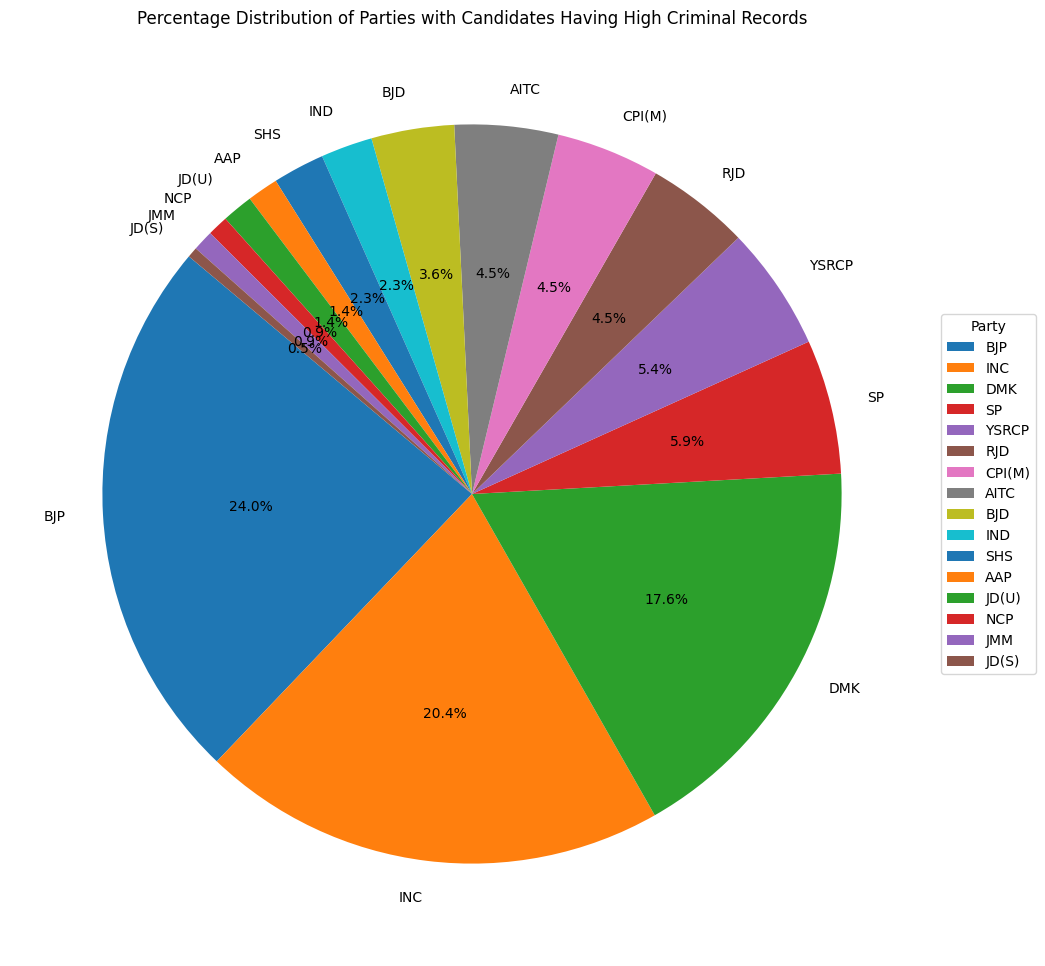

In [22]:
# Plot the pie chart
plt.figure(figsize=(20, 12))
plt.pie(criminal_records_by_party_high, labels=criminal_records_by_party_high.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Parties with Candidates Having High Criminal Records')

# Display the legend in a separate panel
plt.legend(title='Party', bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

# Calculating Percentage Distribution of Parties with High Total Assets

This code segment performs the following steps:

1. **Calculation of Median and Standard Deviation**: It computes the median and standard deviation of total assets in the training dataset.
   
2. **Filtering High Total Assets**: Candidates with total assets higher than the sum of the median and standard deviation are filtered into a new dataframe.

3. **Percentage Distribution by Party**: It calculates the percentage distribution of parties with candidates having high total assets.

4. **Plotting the Pie Chart**: A pie chart is generated to visualize the percentage distribution of parties with candidates having high total assets. Each slice represents a party, and the percentage of candidates with high total assets from each party is shown.


In [19]:

# Calculate median and standard deviation of total assets
total_assets_median = train_data['Total Assets'].median()
total_assets_std = train_data['Total Assets'].std()

# Filter candidates with high total assets
high_total_assets = train_data[train_data['Total Assets'] > (total_assets_median + total_assets_std)]

# Calculate percentage distribution of parties with candidates having high total assets
total_assets_by_party_high = high_total_assets['Party'].value_counts(normalize=True) * 100

print(total_assets_by_party_high)

Party
BJP      33.734940
INC      31.325301
IND       9.638554
YSRCP     8.433735
NCP       4.819277
DMK       2.409639
BJD       2.409639
AAP       2.409639
TDP       2.409639
JD(S)     1.204819
AITC      1.204819
Name: proportion, dtype: float64


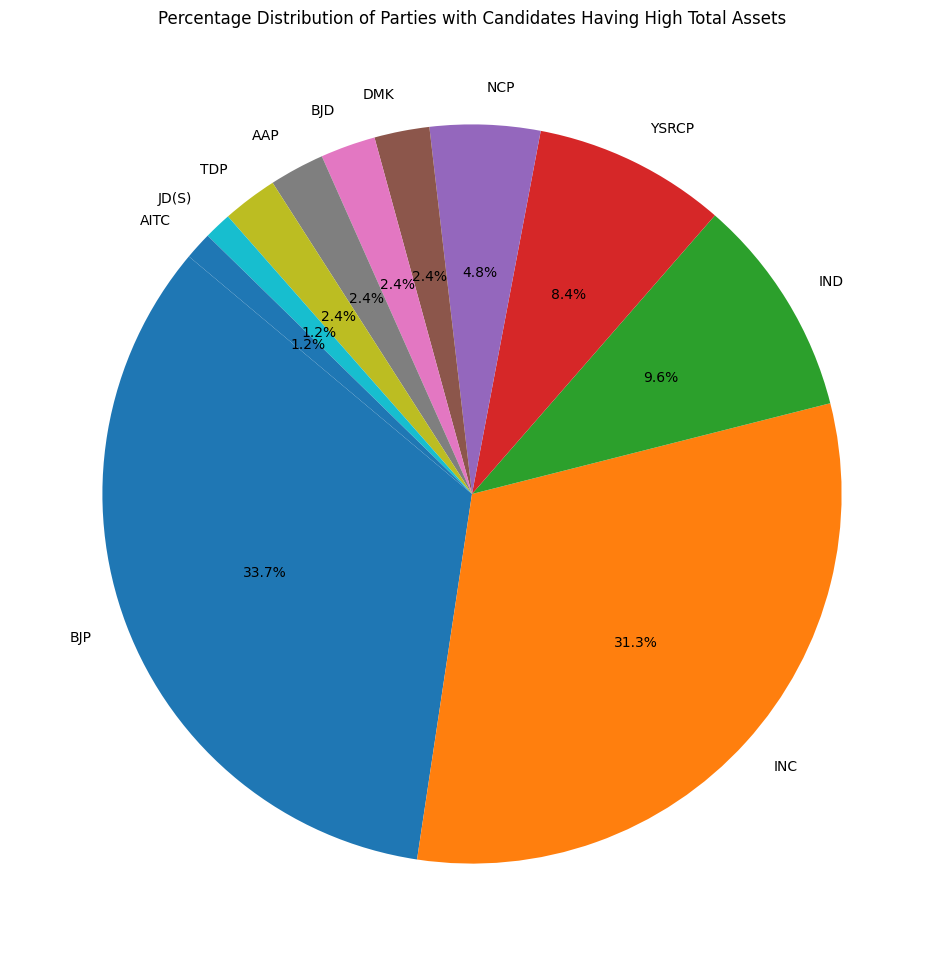

In [20]:
# Plot the pie chart
plt.figure(figsize=(20, 12))
plt.pie(total_assets_by_party_high, labels=total_assets_by_party_high.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Parties with Candidates Having High Total Assets')
plt.show()

# Grouping Data by State and Education Level

This code segment groups the data in the training dataset (`train_data`) by both 'state' and 'Education' columns. It then counts the occurrences of each combination and organizes the results into a new DataFrame using the `groupby()` and `size()` functions.

Next, it plots a stacked bar plot to visualize the distribution of education levels within each state. Each bar represents a state, and the height of the bars indicates the count of individuals with different education levels. The bars are stacked to show the contribution of each education level to the total count within each state.

- **Figure Size**: Sets the size of the figure to (14, 8) inches.
- **Plot Type**: Uses `kind='bar'` to create a bar plot.
- **Stacked Bars**: Bars are stacked (`stacked=True`) to represent multiple education levels within each state.
- **Title and Labels**: Adds a title to the plot as 'State vs. Education'. The x-axis label is set to 'State', and the y-axis label is set to 'Count'. The legend title is set to 'Education Level'.
- **Axis Formatting**: Rotates the x-axis labels by 45 degrees for better readability.
- **Layout Adjustment**: Adjusts the layout of the plot using `plt.tight_layout()` to prevent overlapping elements.


In [17]:
# Grouping data by state and education level
state_education_counts = train_data.groupby(['state', 'Education']).size().unstack(fill_value=0)
print(state_education_counts)


Education          10th Pass  12th Pass  5th Pass  8th Pass  Doctorate  \
state                                                                    
ANDHRA PRADESH             7         18         0         5          3   
ARUNACHAL PRADESH          5          9         0         0          0   
ASSAM                      7          8         0         0          1   
BIHAR                     13         25         1         0         11   
CHHATTISGARH               3         11         1         2          2   
DELHI                      5          8         0         1          0   
GOA                        2          3         0         0          0   
GUJARAT                   20         18         2        11          3   
HARYANA                    4          8         0         1          1   
HIMACHAL PRADESH           6          6         0         0          2   
JHARKHAND                  6          9         0         0          1   
KARNATAKA                 17         2

<Figure size 2000x1200 with 0 Axes>

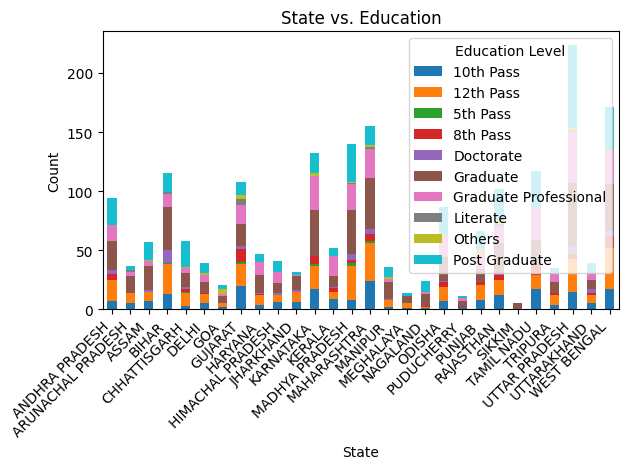

In [18]:
# Plotting the bar plot
plt.figure(figsize=(20, 12))
state_education_counts.plot(kind='bar', stacked=True)
plt.title('State vs. Education')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()

# Grouping Data by Criminal Cases and Education Level

This code segment groups the data in the training dataset (`train_data`) by the 'Education' column and calculates the total number of criminal cases for each education level. It uses the `groupby()` function to group the data by 'Education' and then calculates the sum of 'Criminal Case' for each group.

Next, it plots a bar plot to visualize the number of criminal cases for each education level. Each bar represents an education level, and the height of the bars indicates the total number of criminal cases associated with that education level.

- **Figure Size**: Sets the size of the figure to (14, 8) inches.
- **Plot Type**: Uses `kind='bar'` to create a bar plot.
- **Title and Labels**: Adds a title to the plot as 'Number of Criminal Cases by Education Level'. The x-axis label is set to 'Education Level', and the y-axis label is set to 'Number of Criminal Cases'.
- **Axis Formatting**: Rotates the x-axis labels by 45 degrees for better readability.
- **Layout Adjustment**: Adjusts the layout of the plot using `plt.tight_layout()` to prevent overlapping elements.


In [23]:
# Grouping data by criminal cases and education level
criminal_education_counts = train_data.groupby('Education')['Criminal Case'].sum()
print(criminal_education_counts)



Education
10th Pass                398
12th Pass                639
5th Pass                  23
8th Pass                 148
Doctorate                 63
Graduate                 950
Graduate Professional    652
Literate                   5
Others                    18
Post Graduate            764
Name: Criminal Case, dtype: int64


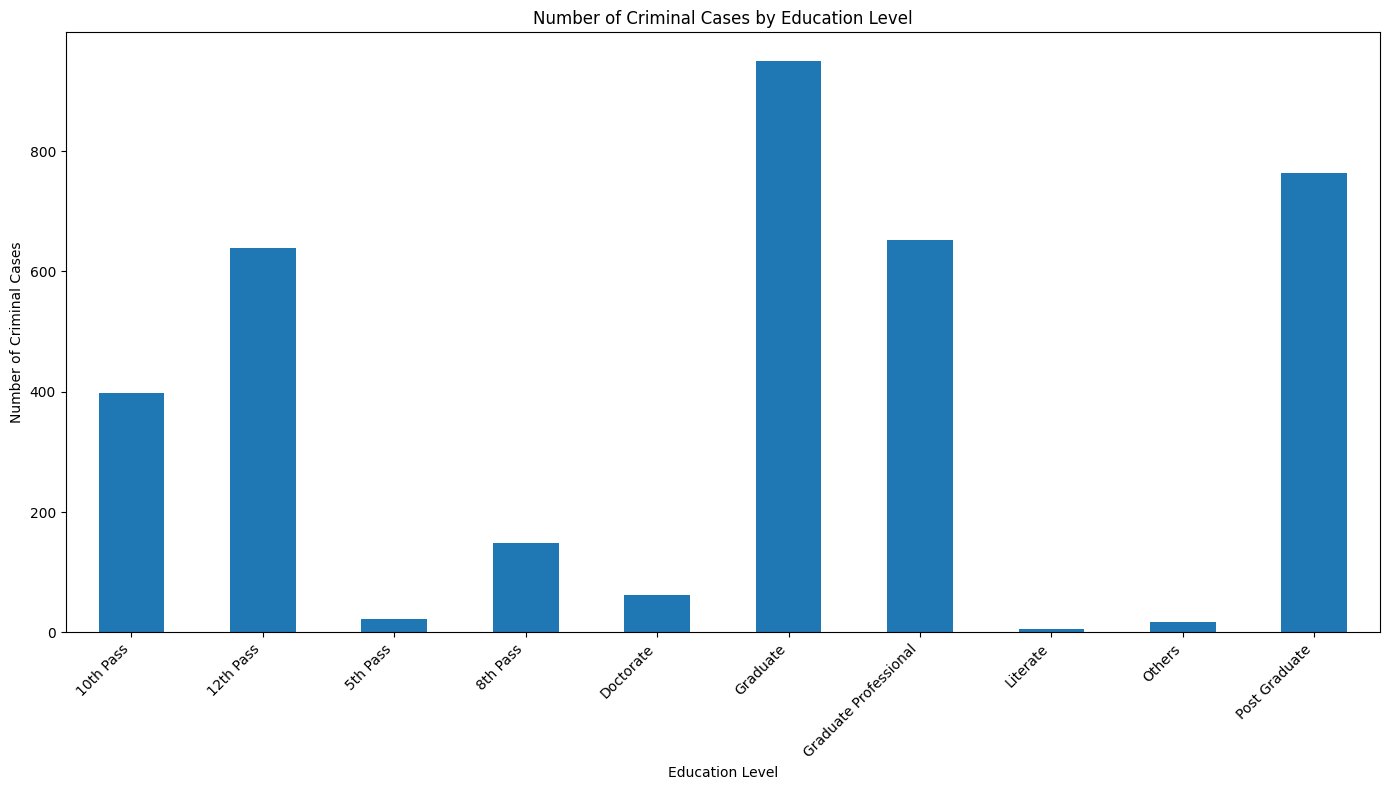

In [24]:
# Plotting the bar plot
plt.figure(figsize=(14, 8))
criminal_education_counts.plot(kind='bar')
plt.title('Number of Criminal Cases by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Criminal Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Feature Engineering

This code segment performs feature engineering on both the training and test datasets. Here's a breakdown of the steps:

1. **Prefix Preference**: It creates a new feature called 'Prefix_Preference' based on the presence of specific titles ('Adv.' or 'Dr.') in the 'Candidate' column. If either of these titles is present, the value is set to 1; otherwise, it is set to 0.

2. **Constituency Preference**: Another new feature called 'Constituency_Preference' is created based on the constituency name. If the constituency name starts with either 'ST' or 'SC', indicating Scheduled Tribes or Scheduled Castes, respectively, the value is set to -1; otherwise, it is set to 0.

3. **Conversion of Categorical Variables**: The categorical variables in the defined 'features' list are converted to numeric format using LabelEncoder.

4. **Print New Dataset**: After performing feature engineering, the new training dataset is printed to display the changes made. This includes the addition of new features and the transformation of categorical variables into numeric format.

The feature-engineered dataset is then ready for further analysis and model training.


In [25]:
# New feature engineering for training data
train_data['Prefix_Preference'] = train_data['Candidate'].apply(lambda x: 1 if 'Adv.' in x or 'Dr.' in x else 0)
train_data['Constituency_Preference'] = train_data['Constituency ∇'].apply(lambda x: -1 if x.startswith(('ST', 'SC')) else 0)

# New feature engineering for test data
test_data['Prefix_Preference'] = test_data['Candidate'].apply(lambda x: 1 if 'Adv.' in x or 'Dr.' in x else 0)
test_data['Constituency_Preference'] = test_data['Constituency ∇'].apply(lambda x: -1 if x.startswith(('ST', 'SC')) else 0)

# Define features and target
features = ['Constituency ∇', 'Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state', 'Prefix_Preference', 'Constituency_Preference']
target = 'Education'

# Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
combined = pd.concat([train_data[features], test_data[features]])

for feature in features:
    le.fit(combined[feature])
    train_data[feature] = le.transform(train_data[feature])
    test_data[feature] = le.transform(test_data[feature])

# Remove non-numeric columns before calculating correlation
numeric_train_data = train_data.select_dtypes(include=['number'])

# Print the new dataset after feature engineering
print("New Training Dataset After Feature Engineering:")
print(train_data)


New Training Dataset After Feature Engineering:
        ID                  Candidate  Constituency ∇  Party  Criminal Case  \
0        0                 M.K. Mohan             121      7              4   
1        1       Khatik Ramesh Prasad            1503      4              0   
2        2           Dr. Mantar Gowda            1852      8              0   
3        3               Kundan Kumar             404      4              0   
4        4            Swapan Majumder             300      4              2   
...    ...                        ...             ...    ...            ...   
2054  2054                    V. Sasi             709      5              1   
2055  2055          Pushkar Lal Dangi            2003      8              0   
2056  2056          Dr. Manju Shiwach            2046      4              0   
2057  2057  Mansing Fattesingrao Naik            2885     13              1   
2058  2058                Nyato Rigia            3069      4              0   

   

# Correlation Heatmap

This code segment generates a correlation heatmap to visualize the pairwise correlation between numerical features in the training dataset (`numeric_train_data`). Here's an overview of the steps:

1. **Figure Size**: Sets the size of the figure to (12, 10) inches to ensure clarity and visibility of the heatmap.

2. **Correlation Calculation**: Calculates the correlation matrix using the `.corr()` method on the `numeric_train_data` DataFrame.

3. **Heatmap Visualization**: Utilizes Seaborn's `heatmap` function to create a heatmap visualization of the correlation matrix. The `annot=True` parameter adds numerical annotations to each cell, displaying the correlation coefficient. The colormap is set to 'coolwarm' to represent positive and negative correlations with distinct colors. The format of the annotations is set to ".2f" to display correlation values with two decimal places.

4. **Title**: Adds a title to the heatmap as 'Correlation Heatmap' for easy interpretation.

The heatmap provides valuable insights into the relationships between different numerical features in the dataset, helping to identify potential patterns and dependencies.


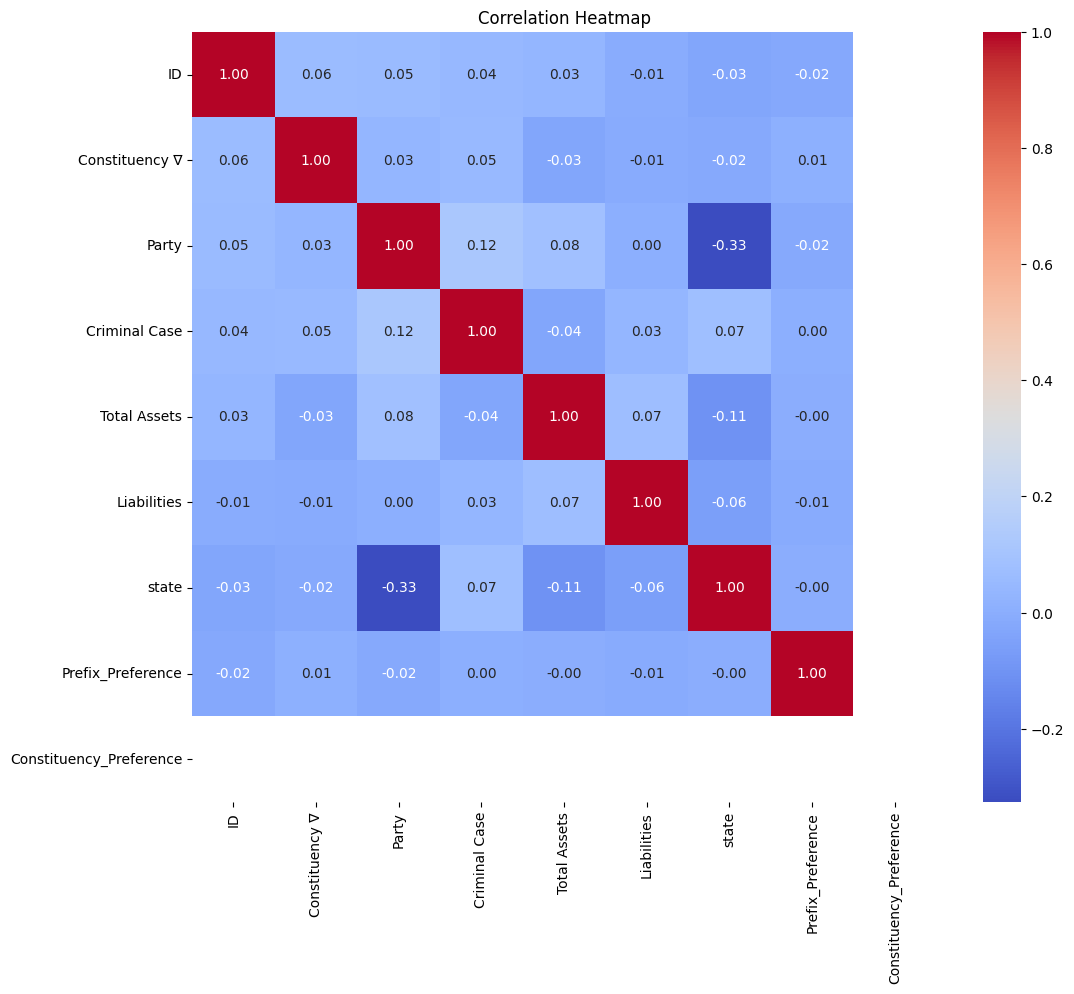

In [26]:
# Display correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Overview Before Splitting

This code snippet provides a glimpse into the training and test data before splitting it into training and validation sets. Here's a breakdown of the printed information:

- **Training Data**: Displays the first few rows of the training dataset (`X_train`) containing the selected features. This allows for a quick inspection of the features' values and structure.

- **Target Labels**: Prints the first five target labels (`y_train`) after applying the `fit_transform` method of the LabelEncoder. This provides insight into how the target variable has been encoded for model training.

- **Test Data**: Shows the initial rows of the test dataset (`X_test`). Similar to the training data, this helps understand the structure and content of the test data before making predictions.

Inspecting the data before splitting ensures that it is loaded and processed correctly, helping to identify any potential issues or inconsistencies early in the analysis.


In [27]:
X_train = train_data[features]
print("Training Data:")
print(X_train.head())

Training Data:
   Constituency ∇  Party  Criminal Case  Total Assets  Liabilities  state  \
0             121      7              4           221           33     23   
1            1503      4              0           108            0     13   
2            1852      8              0           114           41     11   
3             404      4              0           116           46      3   
4             300      4              2           109          133     27   

   Prefix_Preference  Constituency_Preference  
0                  0                        1  
1                  0                        1  
2                  1                        1  
3                  0                        1  
4                  0                        1  


In [28]:
y_train = le.fit_transform(train_data[target])
print("\nTarget Labels:")
print(y_train[:5])


Target Labels:
[3 1 9 9 3]


In [29]:
X_test = test_data[features]
print("\nTest Data:")
print(X_test.head())



Test Data:
   Constituency ∇  Party  Criminal Case  Total Assets  Liabilities  state  \
0            2013      9              2           175            7     14   
1            2940      2              1           109           17     27   
2            3250     13              3           156            1     14   
3             730      2              1           109            0     27   
4            2719     18              0           123           33     25   

   Prefix_Preference  Constituency_Preference  
0                  0                        1  
1                  0                        1  
2                  0                        1  
3                  0                        1  
4                  0                        1  


# Model Training and Prediction

This code snippet performs the following tasks:

1. **Data Splitting**: Splits the training data (`X_train`, `y_train`) into training and validation sets (`X_train_split`, `X_val_split`, `y_train_split`, `y_val_split`) using the `train_test_split` function. The validation set size is set to 20%, and a random state of 42 is used for reproducibility.

2. **Model Training**: Initializes a Random Forest classifier (`rf_classifier`) with 1000 estimators and fits it to the training data (`X_train_split`, `y_train_split`).

3. **Prediction**: Makes predictions on the test set (`X_test`) using the trained model (`rf_classifier.predict(X_test)`).

4. **Conversion of Predictions**: Converts the numeric predictions back to the original class labels using `le.inverse_transform(predictions)`.

5. **CSV Output**: Writes the predictions to a CSV file named 'my_submission_rf_improved_2.csv', containing columns for 'ID' (from the test data) and 'Education' (predicted education level).

This process enables the model to be trained on a subset of the data and validated on another subset before making predictions on unseen test data.


In [30]:
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("Training Set Shapes:")
print("X_train_split:", X_train_split.shape)
print("y_train_split:", y_train_split.shape)
print("Validation Set Shapes:")
print("X_val_split:", X_val_split.shape)
print("y_val_split:", y_val_split.shape)

# Train the model
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(X_train_split, y_train_split)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Convert the numeric predictions back to the original classes
predictions = le.inverse_transform(predictions)

# Write the predictions to a CSV file
submission_df = pd.DataFrame({'ID': test_data['ID'], 'Education': predictions})
submission_df.to_csv('my_submission_rf_improved_2.csv', index=False)


Training Set Shapes:
X_train_split: (1647, 8)
y_train_split: (1647,)
Validation Set Shapes:
X_val_split: (412, 8)
y_val_split: (412,)
